In [1]:
from modules import solve_sdos_adv as slvadv
from modules import solve_sdos as slvsdos
from scipy.sparse.linalg import lsmr
from scipy.signal import savgol_filter
from modules import peakdetect as pd
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [2]:
data=loadtxt("./Data/18c25s004.txt")

In [3]:
smdata=np.zeros(data.shape,np.float64)
for i in range(data.shape[1]):
    smdata[:,i]=savgol_filter(data[:,i],81,2)
    smdata[:,i]=smdata[:,i]/smdata[2100,i]
smdata[:,0]=data[:,0]/100    

<IPython.core.display.Javascript object>


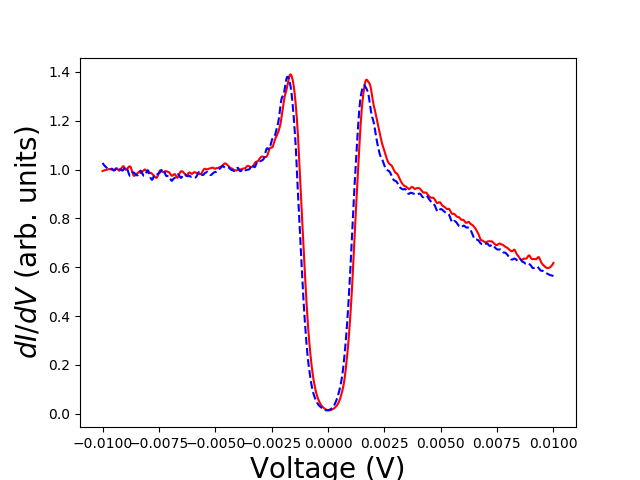

(-0.011007766349999998,
 0.011007003349999999,
 -0.055336613363154118,
 1.4589568246714422)

In [4]:
figure()
plot(smdata[:,0],smdata[:,32],'r-')
plot(smdata[:,0],smdata[:,31],'b--')
xlabel("Voltage (V)",fontsize=20)
ylabel(r"$dI/dV$ (arb. units)",fontsize=20)
plt.axis('tight')

In [5]:
guess=[8e-5,1.3e-3,2.2]
lb=[1e-6,1e-3,1.]
ub=[5e-4,3e-3,3.]
par31=slvadv.get_params(smdata[:,0],smdata[:,31],guess,lb,ub)

# Backward and forward data acquired at same point: due to offset in voltage delta and temperature values are different

In [6]:
par31

array([  7.60062250e-05,   1.45640949e-03,   2.64023097e+00])

In [7]:
guess=[8e-5,1.3e-3,2.2]
lb=[1e-6,1e-3,1.]
ub=[5e-4,3e-3,3.]
par32=slvadv.get_params(smdata[:,0],smdata[:,32],guess,lb,ub)

In [8]:
par32

array([  8.08039467e-05,   1.37845147e-03,   2.40877286e+00])

## offset correction by detecting peak and taking difference of the voltage value at peak position 

In [9]:
offsetcorrected=smdata

In [12]:
import numpy as np
from vector import vector, plot_peaks
from libs import detect_peaks

ImportError: No module named vector